In [7]:
import pandas as pd
filename = "haberman.csv"

In [9]:
columns = ['age', 'year', 'nodes', 'class']

In [10]:
dataframe = pd.read_csv(filename, header=None, names=columns)

In [11]:
dataframe.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
dataframe.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Creating histogram

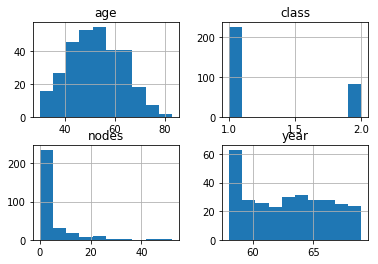

In [17]:
from matplotlib import pyplot
dataframe.hist()
pyplot.show()

### We can see that age appears to have Gaussian distribution, as we might have expected.

### We can also see that year has a uniform distribution, mostly, with an outlier in the first year showing nearly double the number of operations.

### We can see nodes has an exponential type distribution with perhaps most examples showing 0 nodes

### Finally we can see the two-class values with an unequal class distribution, showing perhaps 2- or 3-times more survival than non-survival cases

In [20]:
dataframe['class'].value_counts()

1    225
2     81
Name: class, dtype: int64

In [27]:
target = dataframe['class'].values
from collections import Counter

In [28]:
counter = Counter(target)

In [29]:
for k,v in counter.items():
    per = v / len(target)*100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k,v,per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [33]:
from collections import Counter
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [34]:
# load the dataset
def load_dataset(full_path):
    data = pd.read_csv(full_path, header=None)
    data = data.values
    X, y = data[:, :-1], data[:, -1]
    y = LabelEncoder().fit_transform(y)
    return X, y

In [35]:
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

In [36]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # Evaluate model 
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores